In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape  #To check the shape of dataset

(13320, 9)

In [4]:
#examine Area type feature  
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Cleaning

In [5]:
#droping some columns from df1 
df2 = df1.drop(['area_type','availability', 'society','balcony'] , axis = 'columns')

In [6]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


So, here we got new dataframe after droping some unwanted columns

In [7]:
#Let's check the null value from the datasets
print(df2.isnull().sum())
print('------------------')
print(df2.isnull().mean()*100) 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64
------------------
location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64


Here if we see the NA value is very less if we compare with datasets of '13320'. Hence, we will drop NA value from the datasets. 

In [8]:
df3 = df2.dropna()

In [9]:
df3.isnull().sum() 

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
#Explore Size columns
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

So, here we will create new columns as 'bhk' and will put only the numerical value i.e first array value i.e.[0].

For that we will use lambda function and split the int and string 

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) 

lambda funcation we have use andh here we have split string value and took only numerical from there and converted into int value. [0] is nothinng but take first value of array. 

In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3[df3.bhk>20]   #this can be a outlier

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

So, in total_sqft we found that there is some range value are there. So here what we will do that we will take range value and find that mean value of that. 

In [16]:
def is_float(x):
    try:
        float(x)   #value from total_sqft convert into float and if value are in range then the value will go in Except.
    except:
        return False
    return True

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(10)   #~ this is nigate option

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Here we will only tackel range data fron total_sqft column other value will ignore e.g., 34.46Sq. Meter , 4125Perch

In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')      #here spliting range value 
    if len(tokens) == 2:    #if the the value is in range
        return (float(tokens[0])+float(tokens[1]))/2     
    try:
       return float(x)
    except:
       return None

In [19]:
#will copy df3 into df4. 
df4 = df3.copy()

In [20]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [21]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
#df4.plot(kind='box', figsize=(5,5))

In [23]:
df5 = df4.copy()

In [24]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] #creating new column price per sqft.

In [25]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
df5['location'].value_counts()

Whitefield                         534
Sarjapur  Road                     392
Electronic City                    302
Kanakpura Road                     266
Thanisandra                        233
                                  ... 
AECS LAYOUT A-BLOCK Singasandra      1
Gokaula Extension                    1
M.G Road                             1
Mailasandra                          1
Dominic Layout                       1
Name: location, Length: 1304, dtype: int64

In [27]:
df5['location'].nunique()

1304

In [28]:
df5['location'] = df5['location'].apply(lambda x: x.strip())

In [29]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [30]:
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [31]:
len(location_stats[location_stats<=10])

1052

So here we found that there is total 1052 location out off 1293 <=. hence we will consider these location as 'other'

In [32]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [33]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [34]:
df5['location'].nunique()

242

In [35]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier  Removal

In [36]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


Here we can see that we have divided total_sqft with bhk. the reason behind is that is it posibble 300 sqft with 6 bedroom. may be not. hence this can be outlier 

In [37]:
#df5 of dataset shape 
df5.shape

(13246, 7)

In [38]:
#now will take new dataframe as df6. 
df6 = df5[~(df5.total_sqft/df5.bhk<300)]  #here we neglating some data which we have find above

In [39]:
df6.shape

(12502, 7)

In [40]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

will remove outliter from price_per_sqft columns

In [41]:
def remove_ppsqft_outlier(df):  #here we taking df as input
    df_out = pd.DataFrame()   
    for key, subdf in df.groupby('location'):  #grouping by location will get subdf and by using subdataframe(subdf) will find mean and standard deviation
        m=np.mean(subdf.price_per_sqft)      #find mean
        st = np.std(subdf.price_per_sqft)    #find standard deviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] #Here filtering data beyond standard deviation which means anything above mean minus standard deviation and anything mean plus standard deviation and that will keep it in reduced dataframe(reduced_df)
        df_out = pd.concat([df_out, reduced_df],ignore_index = True)
    return df_out

In [42]:
df7 = remove_ppsqft_outlier(df6)
df7.shape

(10241, 7)

so if we compare df6 and df7 we found that near of 2000 data get reduced and that was outlier.  

now we have to find that the 2bhk of price is more than 3 bhk of price. so here we will find this type of outlier. 

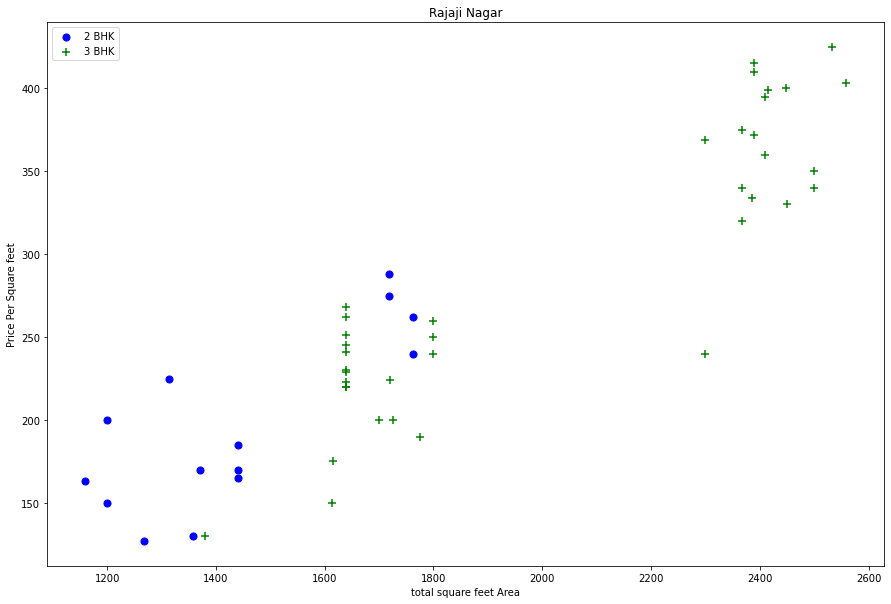

In [43]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+',color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('total square feet Area')
    plt.ylabel('Price Per Square feet')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, 'Rajaji Nagar')

here if we see we found that the price of 2 bhk is higher that 3bhk of price for the square feet near of 1800. 

In [44]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.price_per_sqft),
            'std' : np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
        }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk -1)
        if stats and stats['count']>5:
             exclude_indices = np.append(exclude_indices ,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outlier(df7)
df8.shape

(9968, 7)

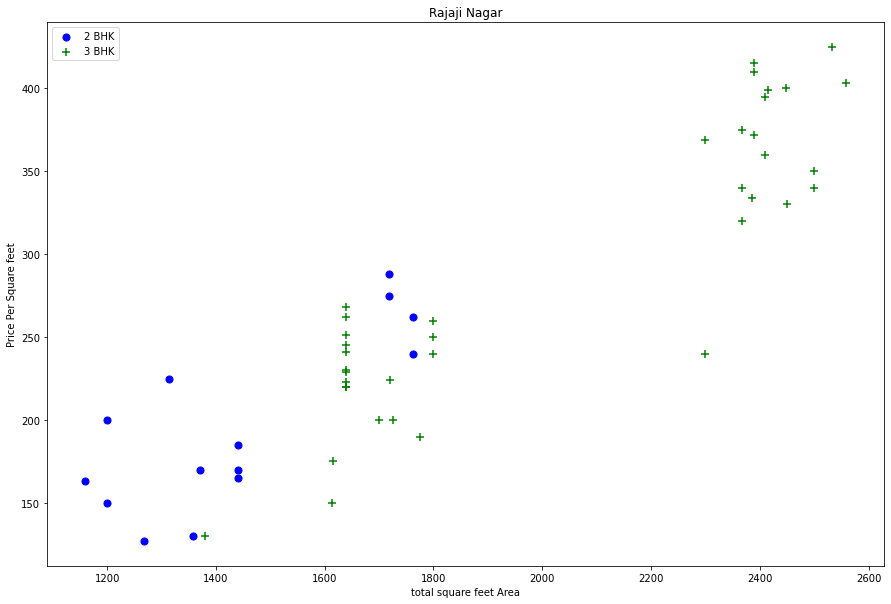

In [45]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+',color = 'green', label = '3 BHK', s = 50)
    plt.xlabel('total square feet Area')
    plt.ylabel('Price Per Square feet')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

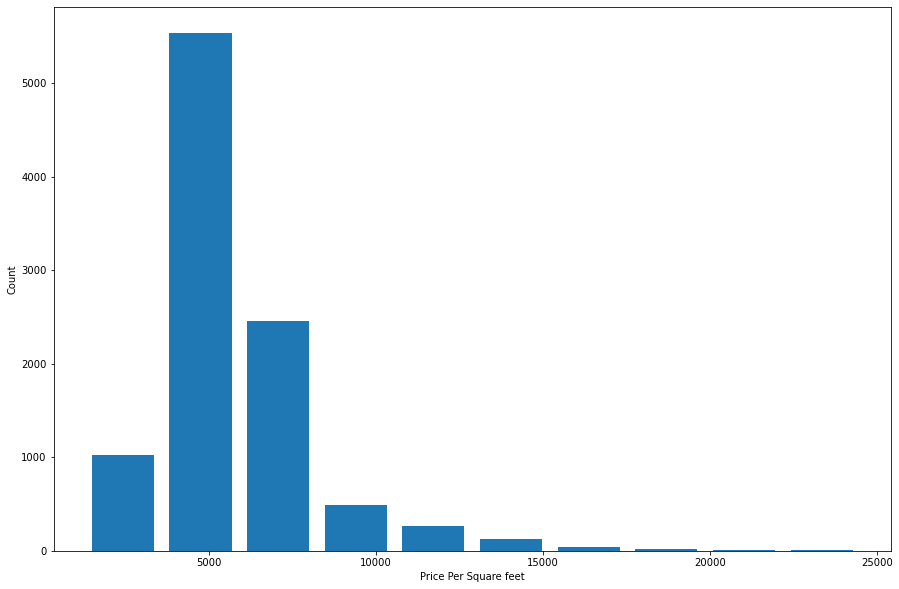

In [46]:
plt.rcParams['figure.figsize'] = (15,10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price Per Square feet')
plt.ylabel('Count')

In [47]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [48]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

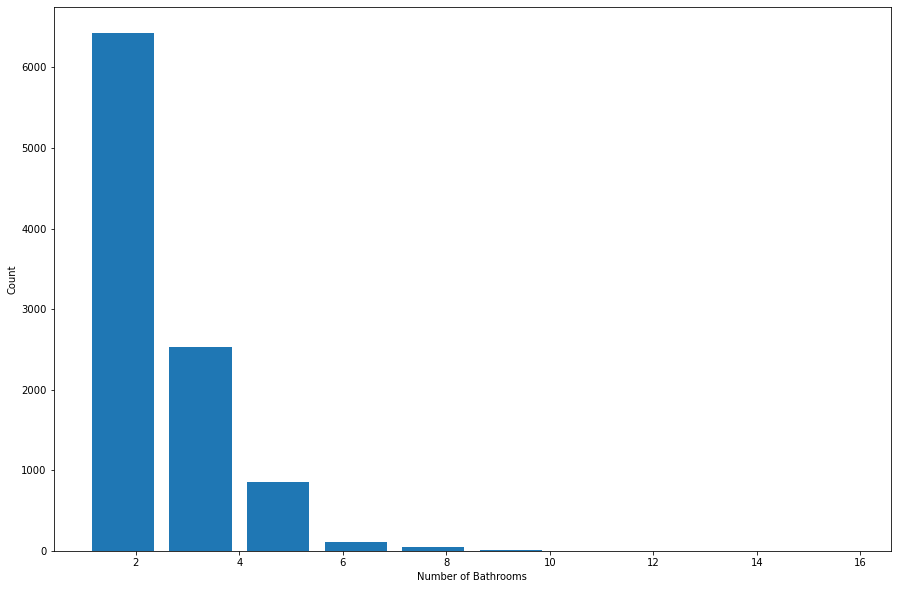

In [49]:
plt.hist(df8.bath , rwidth = 0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [50]:
df8[df8.bath>df8.bhk +2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [51]:
df9 = df8[df8.bath<df8.bhk +2]

In [52]:
df9.shape

(9876, 7)

In [53]:
df10 = df9.drop(['size','price_per_sqft'], axis = 'columns')

In [54]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [55]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')],axis = 'columns')

In [57]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df12 = df11.drop('location', axis = 'columns')

In [59]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df12.shape

(9876, 245)

# Model Building

### Train_test_split

In [61]:
X = df12.drop('price', axis = 'columns')
y = df12.price

In [62]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

## Linear Regression Model

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8145815442445706

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression() , X, y, cv=cv)

array([0.82555294, 0.75753171, 0.79502344, 0.78884513, 0.84174676])

In [67]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    alogs = {
        'linear_regression' :{
            'model' : LinearRegression(),
            'params' : {
                'normalize' :[True, False]
            }
        },
        'lasso' :{
             'model': Lasso(), 
             'params' : {
                'alpha':[1,2],
                'selection' :['random', 'cyclic']
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeRegressor(),
        'params':{
            'criterion' :['mse','friedman_mse'],
            'splitter' : ['best' , 'random']
        }
    }
    
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in alogs.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' :algo_name,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.801740,{'normalize': False}
1,lasso,0.672800,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.672888,"{'criterion': 'mse', 'splitter': 'random'}"


In [85]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr.predict([x])[0]  

In [86]:
predict_price('1st Phase JP Nagar',1000,2,2)

88.7664943819054

In [88]:
predict_price('1st Block Jayanagar',2850,4,4)

339.29912504871504

# Model file Export 

In [89]:
import pickle
with open('Bengaluru_House_Price_model.pickle', 'wb') as f:
    pickle.dump(lr,f)

In [93]:
#due to need of columns information hence we are importing json
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns] #col.lower is basically nothing but converting all columns into lower case
    
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))